# Método de Newton
***

O método de Newton é semelhante ao método da secante, mas ao calcular a inclinação da reta a partir de dois pontos consecutivos, utilizamos uma derivada fornecida explicitamente. Desta forma, a regra de atualização fica:

$$x' = x - \frac{f(x)}{f'(x)}$$

O método de Newton tende a ser extremamente rápido, mas o usuário precisa fornecer a derivada explicitamente.

Dependendo da função o método de newton tende a ser o mais rápido de todos

***
### Exemplos
***

Importa as bibliotecas

In [1]:
import numpy
import matplotlib.pyplot as matplot
%matplotlib inline

***

Definimos a nossa função $f(x) = x^2 + 2x + 1$ e o valor de $y_0$

Queremos encontrar o valor de $x$ para o qual $f(x) = y_0$

In [2]:
def f(x):
    return x*x + 2*x + 1

y0 = 42

***

Definimos $g(x)$, a função que queremos encontrar os zeros

In [3]:
def g(x):
    return f(x) - y0

***

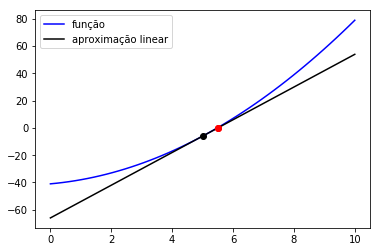

0) g(x): -6.00e+00


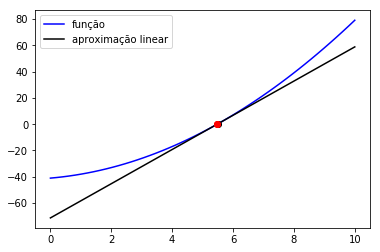

1) g(x): 2.50e-01


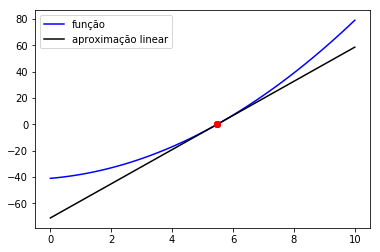

2) g(x): 3.70e-04


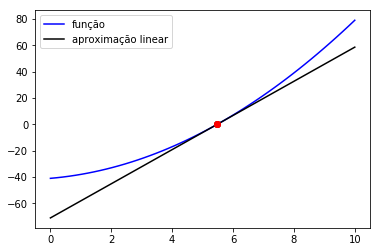

3) g(x): 8.14e-10


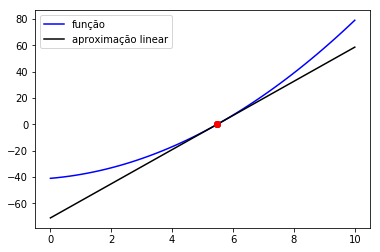

4) g(x): -7.11e-15


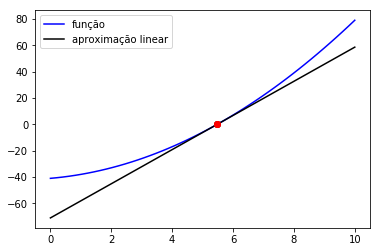

5) g(x): 0.00e+00


In [4]:
def g_derivative(x):
    return 2 * x + 2

X = numpy.linspace(0, 10)
Y = g(X)
x = 5

for i in range(6):
    # Propriedades da reta aproximadora para desenhar no gráfico
    m = g_derivative(x)
    Y_reta = g(x) + m * (X - x)
    x_zero = x - g(x) / m
    
    matplot.plot(X, Y, 'b-', label='função')
    matplot.plot(X, Y_reta, 'k-', label='aproximação linear')
    matplot.plot([x], [g(x)], 'ko')
    matplot.plot([x_zero, x_zero], [0, g(x_zero)], 'ro--')
    matplot.legend(loc='best')
    matplot.show()
    print('%s) g(x): %.2e' % (i, g(x)))
    
    # Regra de atualização
    x = x - g(x)/g_derivative(x)

***
### Função
***

In [5]:
def newton(g, g_derivative, x0=0, x_tolerance=1e-6, y_tolerance=1e-6):
    """
    Calcula o zero da função g(x) com derivada g_derivative(x) partindo do valor inicial
    x0.
    
    Argumentos:
    
        g: uma função de uma única variável
        g_derivative: derivada de g(x)
        x0: valor inicial
        x_tolerance: tolerância em x (retorna quando intervalo for menor que x_tolerance)
        y_tolerance: tolerância em y (retorna quando |g(x)| < y_tolerance)
    
    Retornos:
    
        Retorna um zero de g(x) (valor de x em que g(x) = 0).
    """
    
    x = x0
    
    while True:
        value = g(x)
        diff = g_derivative(x)
        x = x - value / diff
        if abs(value / diff) < x_tolerance or abs(value) < y_tolerance:
            break
    return x

***

In [6]:
print("x =", newton(g, g_derivative, 5))

x = 5.4807406984078595


***

In [7]:
def cos_derivative(x):
    return -numpy.sin(x)

print("x =", newton(numpy.cos, cos_derivative, 2))

x = 1.57079632679
